In [1]:
# Magnitude of true label cross-entropy at temperature 1 vs cross-entropy of soft targets at various temperatures

import torch

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [17]:
# function to compute gradient magnitude at a given temperature
def getGradient(z, v, T, softmax_fn):
    z_softmax = softmax_fn(torch.from_numpy(z.numpy() / T))
    v_softmax = softmax_fn(torch.from_numpy(v.numpy() / T))
    return (torch.norm(z_softmax - v_softmax).item() / T)

In [18]:
# softmax function
softmax_fn = torch.nn.Softmax(dim=0)

In [19]:
# get sample vectors
# v - target vector; z - trainable variables
size = 100
a = -20
b = 20
np.random.seed(0)
z = a + (b - a) * np.random.rand(size)
v = np.random.rand(size)
v = a + (b - a) * np.random.rand(size)

In [28]:
# For each temperature value, get magnitude of gradient.
num_temp = 100
x = np.arange(num_temp) + 1
y = np.empty((num_temp, ))
for i in range(x.shape[0]):
    y[i] = getGradient(torch.from_numpy(z), torch.from_numpy(v), x[i], softmax_fn)
    
# normalize the gradients with that at temperature 1
y /= y[0]

x_ref = np.arange(num_temp) + 1
y_ref = 1 / x_ref ** 2

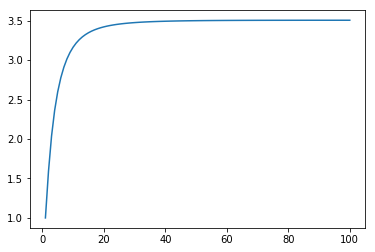

In [29]:
plt.plot(x, y / y_ref)
plt.show()

# this plot shows that multiplying gradient magnitude by T^2 helps to avoid change of learning rate
# It also helps to avoid change of weight between true label cross-entropy and soft label cross-entropy